In [17]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch

### Sparsity and selectivity and test accuracy in one graph

In [18]:
def test_val_extractor(file_name):    
    test_val_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if (i - 1) % 6 == 0:
                line = ast.literal_eval(line)
                test_val_accumulator.append(line[-1])
    
#     print("\ntest_val_accumulator: ", test_val_accumulator)
    return test_val_accumulator

In [19]:
def sparsity_val_extractor(file_name):
    sparsity_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if (i - 2) % 6 == 0:
                # extract certain format like X.XXX
                sparsity_list = re.findall("\d+\.\d+", line)
                # change to str type to use 'replace'
                sparsity_list = str(sparsity_list)
                # replace ' to none 
                sparsity_list = sparsity_list.replace("'", "")
                # use ast.literal_eval to change from str to list type
                sparsity_list = ast.literal_eval(sparsity_list)
                if not sparsity_list:
                    sparsity_accumulator.append(0)
                else:
                    sparsity_accumulator.append(sparsity_list[-1])
                
    
    
    for i, element in enumerate(sparsity_accumulator):
        if not 0 <= element <= 1:
#             print(f"{i}-th element: error")
            sparsity_accumulator[i] = 0
    
#     print("\nsparsity_accumulator: ", sparsity_accumulator)
    return sparsity_accumulator

In [20]:
def selectivity_val_extractor(file_name):
    selectivity_average_accumulator = list()
    selectivity_std_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if (i - 3) % 6 == 0:
                selectivity_average = ast.literal_eval(line)
                selectivity_average_accumulator.append(selectivity_average)
            if (i - 4) % 6 == 0:
                selectivity_std = ast.literal_eval(line)
                selectivity_std_accumulator.append(selectivity_std)
    
#     print("\nselectivity_average_accumulator: ", selectivity_average_accumulator)
#     print("\nselectivity_std_accumulator: ", selectivity_std_accumulator)
    return selectivity_average_accumulator, selectivity_std_accumulator

In [21]:
def all_plotter(__list__, test_acc_list, sparsity_list, selectivity_average_list, selectivity_std_list, location='best'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
    ax1.plot(__list__, test_acc_list, marker='o', label='test accuracy', c='r')
    ax1.plot(__list__, sparsity_list, marker='v', label='sparsity', c='goldenrod')
    ax1.errorbar(__list__, selectivity_average_list, selectivity_std_list, marker='^', label='selectivity', c='b')
    ax1.set_ylim([-0.2,1.2])
    ax1.grid()
    ax1.legend(loc=location)
    ax1.set_title('Accuracy, Sparsity, and Selectivity')
    
    # Accuracy x Sparsity (or Selectivity)
    ax2.plot(__list__, [a * b for a, b in zip(test_acc_list, sparsity_list)], 
             marker='v', label='Accuracy x Sparsity', c='orange')
    ax2.plot(__list__, [a * b for a, b in zip(test_acc_list, selectivity_average_list)], 
             marker='^', label='Accuracy x Selectivity', c='purple')
    ax2.set_ylim([-0.2,1.2])
    ax2.legend(loc=location)
    ax2.grid()
    ax2.set_title('Accuracy x Sparsity (and Selectivity)')
    
    plt.show()

In [22]:
rho_list = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
betas_lhs = [0.0001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.999]
betas_rhs = [0.0001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.999]
learning_rate = np.logspace(-5, 1, 11)
weight_decay = np.logspace(-5, 1, 11)
momentum = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Adadelta

## learning rate

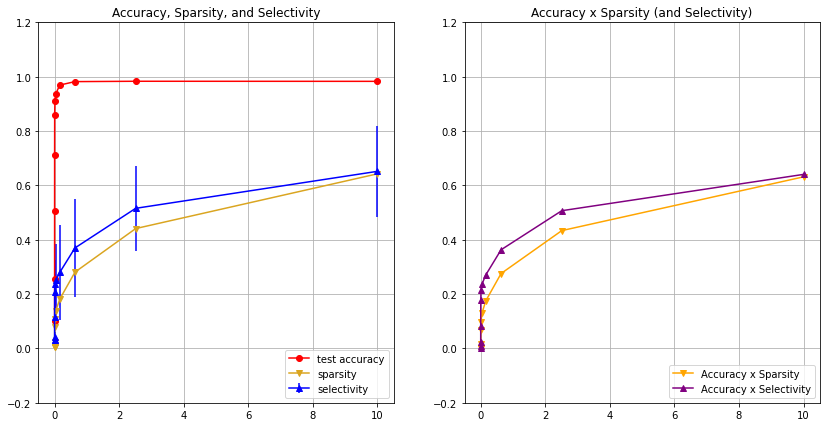

In [23]:
test_vals  = test_val_extractor('sparsity_selectivity_adadelta_learning_rate.txt')
sparsities = sparsity_val_extractor('sparsity_selectivity_adadelta_learning_rate.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("sparsity_selectivity_adadelta_learning_rate.txt")

all_plotter(learning_rate, test_vals, sparsities, selectivity_average, selectivity_std, 'lower right')

## rho

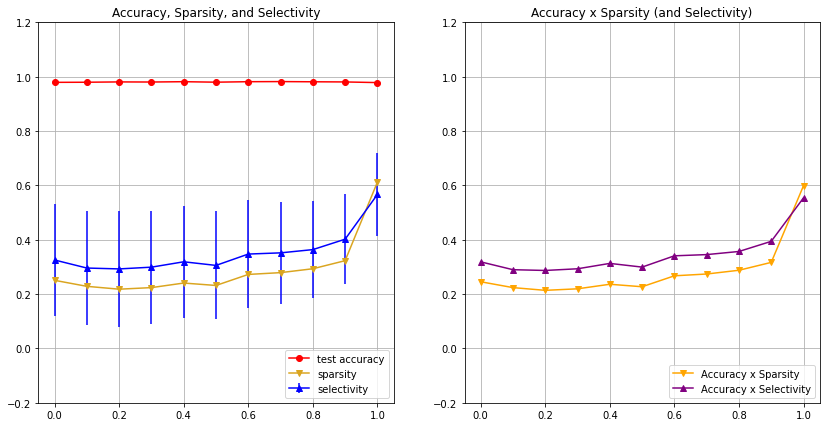

Adadelta rho
accuacy value deviation of: rho 1.0 - original= -0.0009000000000000119
accuracy percentage deviation of: rho 1.0 / original= 99.90806945863126

sparsity value deviation of: rho 1.0 - original= 0.3614
sparsity percentage deviation of: rho 1.0 / original= 244.2138866719872

selectivity avg value deviation of: rho 1.0 - original= 0.24101017058380947
selectivity avg percentage deviation of: rho 1.0 / original= 174.0690245828246

selectivity std value deviation of: rho 1.0 - original= -0.055739128198406346
selectivity std percentage deviation of: rho 1.0 / original= 73.12030233234945


In [25]:
test_vals  = test_val_extractor('sparsity_selectivity_adadelta_rho.txt')
sparsities = sparsity_val_extractor('sparsity_selectivity_adadelta_rho.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("sparsity_selectivity_adadelta_rho.txt")

all_plotter(rho_list, test_vals, sparsities, selectivity_average, selectivity_std, 'lower right')

print("Adadelta rho")
print("accuacy value deviation of: rho 1.0 - original=", test_vals[-1] - test_vals[0])
print("accuracy percentage deviation of: rho 1.0 / original=", (test_vals[-1] / test_vals[0])*100)
print()
print("sparsity value deviation of: rho 1.0 - original=", sparsities[-1] - sparsities[0])
print("sparsity percentage deviation of: rho 1.0 / original=", (sparsities[-1] / sparsities[0])*100)
print()
print("selectivity avg value deviation of: rho 1.0 - original=", selectivity_average[-1] - selectivity_average[0])
print("selectivity avg percentage deviation of: rho 1.0 / original=", (selectivity_average[-1] / selectivity_average[0])*100)
print()
print("selectivity std value deviation of: rho 1.0 - original=", selectivity_std[-1] - selectivity_std[0])
print("selectivity std percentage deviation of: rho 1.0 / original=", (selectivity_std[-1] / selectivity_std[0])*100)

## weight decay

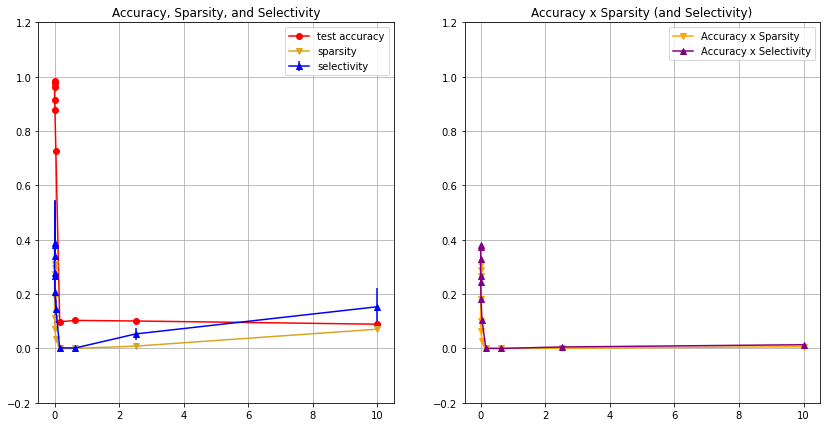

In [26]:
test_vals  = test_val_extractor('sparsity_selectivity_adadelta_weight_decay.txt')
sparsities = sparsity_val_extractor('sparsity_selectivity_adadelta_weight_decay.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("sparsity_selectivity_adadelta_weight_decay.txt")

all_plotter(weight_decay, test_vals, sparsities, selectivity_average, selectivity_std, 'upper right')

## weight decay closer look

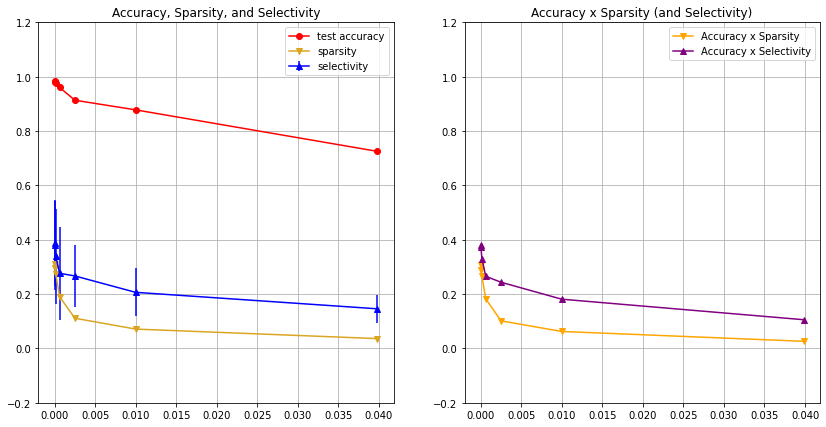

In [27]:
test_vals  = test_val_extractor('sparsity_selectivity_adadelta_weight_decay.txt')
sparsities = sparsity_val_extractor('sparsity_selectivity_adadelta_weight_decay.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("sparsity_selectivity_adadelta_weight_decay.txt")

# modification 
new_test_vals = test_vals.copy()
new_sparsities = sparsities.copy()
new_selectivity_average = selectivity_average.copy()
new_selectivity_std = selectivity_std.copy()
new_weight_decay = weight_decay.copy()

new_test_vals = new_test_vals[:-4]
new_sparsities = new_sparsities[:-4]
new_selectivity_average = new_selectivity_average[:-4]
new_selectivity_std = new_selectivity_std[:-4]
new_weight_decay = new_weight_decay[:-4]

all_plotter(new_weight_decay, new_test_vals, new_sparsities, new_selectivity_average, new_selectivity_std, 'upper right')

# Adagrad

## learning rate


learning_rate_1 [1.00000000e-05 3.98107171e-05 1.58489319e-04 6.30957344e-04
 2.51188643e-03 1.00000000e-02 3.98107171e-02 1.58489319e-01
 6.30957344e-01 2.51188643e+00 1.00000000e+01]

learning_rate_1 [1.00000000e-05 3.98107171e-05 1.58489319e-04 6.30957344e-04
 2.51188643e-03 1.00000000e-02 3.98107171e-02 1.58489319e-01
 6.30957344e-01 2.51188643e+00]


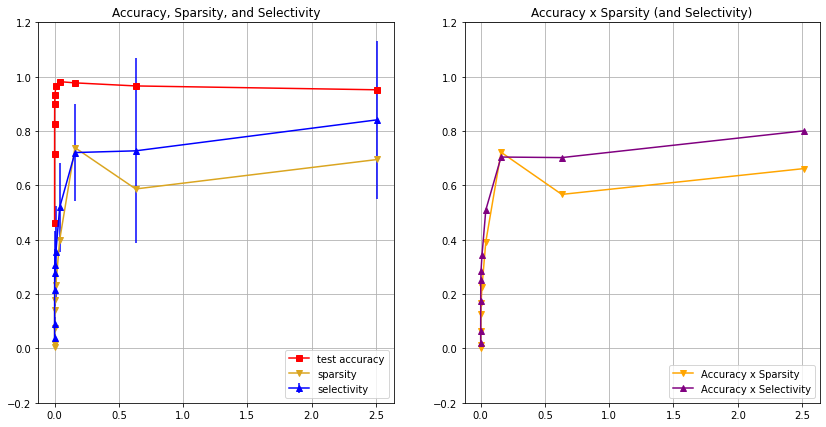

In [29]:
test_vals  = test_val_extractor('sparsity_selectivity_adagrad_learning_rate.txt')
sparsities = sparsity_val_extractor('sparsity_selectivity_adagrad_learning_rate.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("sparsity_selectivity_adagrad_learning_rate.txt")

learning_rate_1 = np.logspace(-5, 1, 11)
print("\nlearning_rate_1", learning_rate_1)
learning_rate_1 = learning_rate_1[:10]
print("\nlearning_rate_1", learning_rate_1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

ax1.plot(learning_rate_1, test_vals[:10], 
         marker='s', label='test accuracy', c='r')

ax1.plot(learning_rate_1, sparsities[:10], 
         marker='v', label='sparsity', c='goldenrod')

ax1.errorbar(learning_rate_1, selectivity_average[:10], selectivity_std[:10], 
             marker='^', label='selectivity', c='b')

ax1.set_ylim([-0.2,1.2])
ax1.legend(loc='lower right')
ax1.set_title('Accuracy, Sparsity, and Selectivity')
ax1.grid()

ax2.plot(learning_rate_1, [a * b for a, b in zip(test_vals[:10], sparsities[:10])], 
         marker='v', label='Accuracy x Sparsity', c='orange')

ax2.plot(learning_rate_1, [a * b for a, b in zip(test_vals[:10], selectivity_average[:10])], 
         marker='^', label='Accuracy x Selectivity', c='purple')

ax2.set_ylim([-0.2,1.2])
ax2.set_title('Accuracy x Sparsity (and Selectivity)')
ax2.legend(loc='lower right')
ax2.grid()

plt.show()

## weight decay

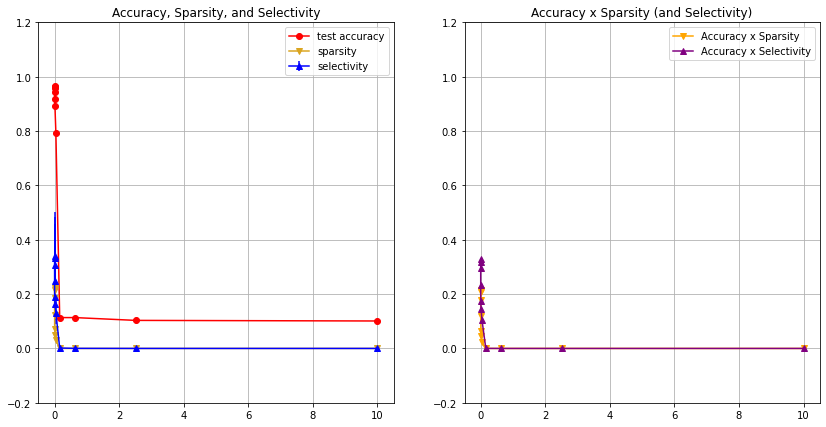

In [30]:
test_vals  = test_val_extractor('sparsity_selectivity_adagrad_weight_decay.txt')
sparsities = sparsity_val_extractor('sparsity_selectivity_adagrad_weight_decay.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("sparsity_selectivity_adagrad_weight_decay.txt")

all_plotter(weight_decay, test_vals, sparsities, selectivity_average, selectivity_std, 'best')

## weight decay closer look

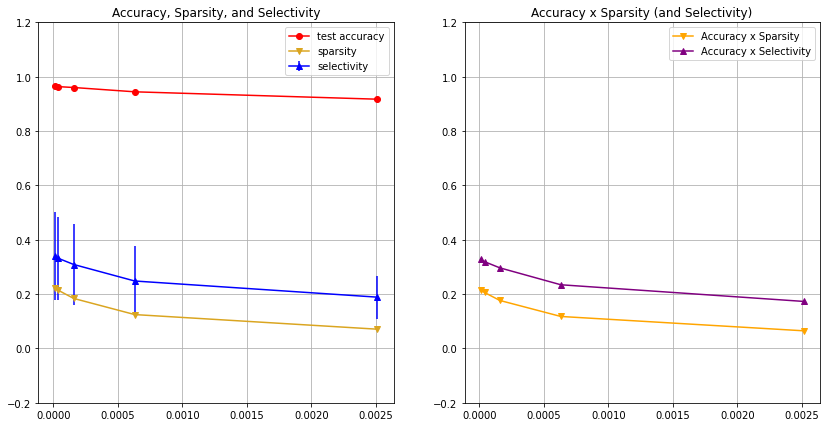

In [31]:
test_vals  = test_val_extractor('sparsity_selectivity_adagrad_weight_decay.txt')
sparsities = sparsity_val_extractor('sparsity_selectivity_adagrad_weight_decay.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("sparsity_selectivity_adagrad_weight_decay.txt")

# modification 
new_test_vals = test_vals.copy()
new_sparsities = sparsities.copy()
new_selectivity_average = selectivity_average.copy()
new_selectivity_std = selectivity_std.copy()
new_weight_decay = weight_decay.copy()

new_test_vals = new_test_vals[:-6]
new_sparsities = new_sparsities[:-6]
new_selectivity_average = new_selectivity_average[:-6]
new_selectivity_std = new_selectivity_std[:-6]
new_weight_decay = new_weight_decay[:-6]

all_plotter(new_weight_decay, new_test_vals, new_sparsities, new_selectivity_average, new_selectivity_std, 'best')

# Adam

## betas lhs

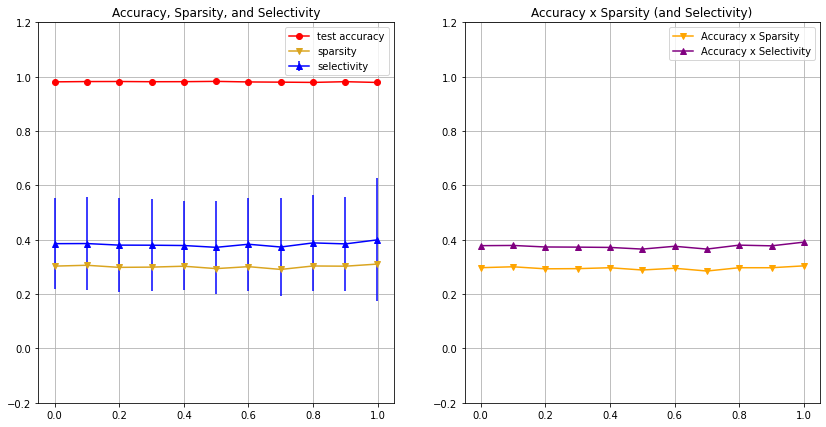

In [32]:
test_vals  = test_val_extractor('sparsity_selectivity_Adam_betas_lhs.txt')
sparsities = sparsity_val_extractor('sparsity_selectivity_Adam_betas_lhs.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("sparsity_selectivity_Adam_betas_lhs.txt")

all_plotter(betas_lhs, test_vals, sparsities, selectivity_average, selectivity_std, 'best')

## betas rhs 재검토 필요

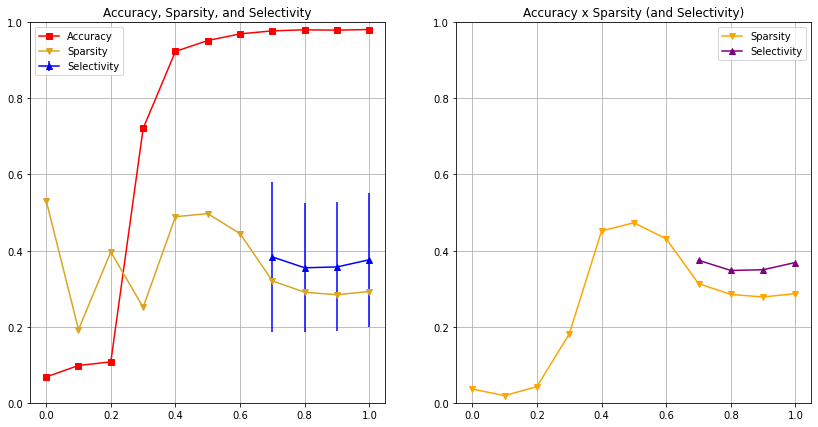

In [34]:
test_vals  = test_val_extractor('sparsity_selectivity_Adam_betas_rhs.txt')
sparsities = sparsity_val_extractor('sparsity_selectivity_Adam_betas_rhs.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("sparsity_selectivity_Adam_betas_rhs.txt")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

ax1.plot(betas_rhs, test_vals, marker='s', label='Accuracy', c='r')
ax1.plot(betas_rhs, sparsities, marker='v', label='Sparsity', c='goldenrod')
ax1.errorbar(betas_rhs[7:], selectivity_average[7:], selectivity_std[7:], marker='^', label='Selectivity', c='b')
ax1.set_ylim([0,1.0])
ax1.grid()
ax1.legend()
ax1.set_title('Accuracy, Sparsity, and Selectivity')

ax2.plot(betas_rhs, [a * b for a, b in zip(test_vals, sparsities)],
         marker='v', label='Sparsity', c='orange')
ax2.plot(betas_rhs[7:], [a * b for a, b in zip(test_vals[7:], selectivity_average[7:])],
         marker='^', label='Selectivity', c='purple')
ax2.grid()
ax2.legend()
ax2.set_ylim([0,1.0])
ax2.set_title('Accuracy x Sparsity (and Selectivity)')

plt.show()

## learning rate 

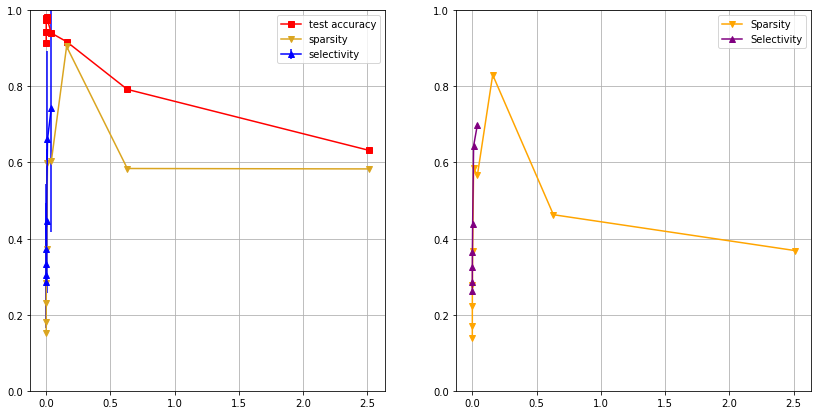

In [37]:
test_vals  = test_val_extractor('sparsity_selectivity_Adam_learning_rate.txt')
sparsities = sparsity_val_extractor('sparsity_selectivity_Adam_learning_rate.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("sparsity_selectivity_Adam_learning_rate.txt")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
ax1.plot(learning_rate[:-1], test_vals[:-1], marker='s', label='test accuracy', c='r')
ax1.plot(learning_rate[:-1], sparsities[:-1], marker='v', label='sparsity', c='goldenrod')
ax1.errorbar(learning_rate[:-4], selectivity_average[:-4], selectivity_std[:-4], marker='^', label='selectivity', c='b')
ax1.set_ylim([0,1])
ax1.grid()

ax2.plot(learning_rate[:-1], [a * b for a, b in zip(test_vals[:-1], sparsities[:-1])], 
         marker='v', label='Sparsity', c='orange')

ax2.plot(learning_rate[:-4], [a * b for a, b in zip(test_vals[:-4], selectivity_average[:-4])], 
         marker='^', label='Selectivity', c='purple')
ax2.set_ylim([0,1])
ax2.grid()

ax1.legend()
ax2.legend()
plt.show()

## learning rate closer look

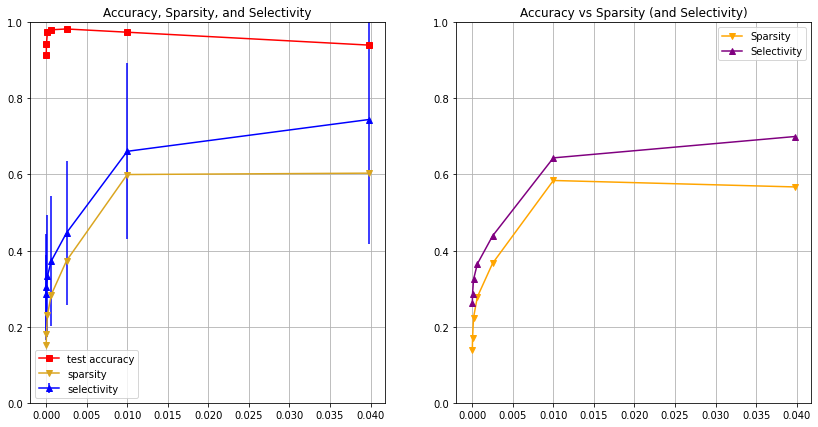

In [38]:
test_vals  = test_val_extractor('sparsity_selectivity_Adam_learning_rate.txt')
sparsities = sparsity_val_extractor('sparsity_selectivity_Adam_learning_rate.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("sparsity_selectivity_Adam_learning_rate.txt")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

ax1.plot(learning_rate[:-4], test_vals[:-4], marker='s', label='test accuracy', c='r')
ax1.plot(learning_rate[:-4], sparsities[:-4], marker='v', label='sparsity', c='goldenrod')
ax1.errorbar(learning_rate[:-4], selectivity_average[:-4], selectivity_std[:-4], marker='^', label='selectivity', c='b')
ax1.set_ylim([0,1.0])
ax1.grid()
ax1.legend()
ax1.set_title('Accuracy, Sparsity, and Selectivity')

ax2.plot(learning_rate[:-4], 
         [a * b for a, b in zip(test_vals[:-4], sparsities[:-4])], 
         marker='v', label='Sparsity', c='orange')

ax2.plot(learning_rate[:-4], 
         [a * b for a, b in zip(test_vals[:-4], selectivity_average[:-4])], 
         marker='^', label='Selectivity', c='purple')
ax2.set_title('Accuracy vs Sparsity (and Selectivity)')
ax2.set_ylim([0,1.0])
ax2.grid()
ax2.legend()

plt.show()

## weight decay

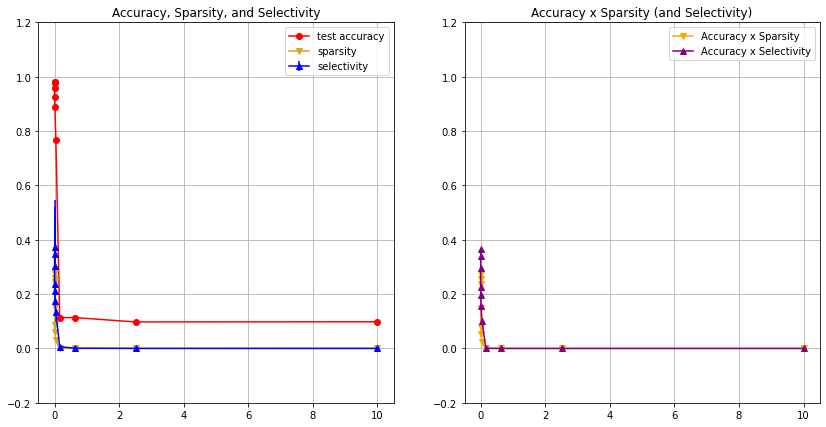

In [39]:
test_vals  = test_val_extractor('sparsity_selectivity_Adam_weight_decay.txt')
sparsities = sparsity_val_extractor('sparsity_selectivity_Adam_weight_decay.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("sparsity_selectivity_Adam_weight_decay.txt")

all_plotter(weight_decay, test_vals, sparsities, selectivity_average, selectivity_std, 'best')

## weight decay closer look

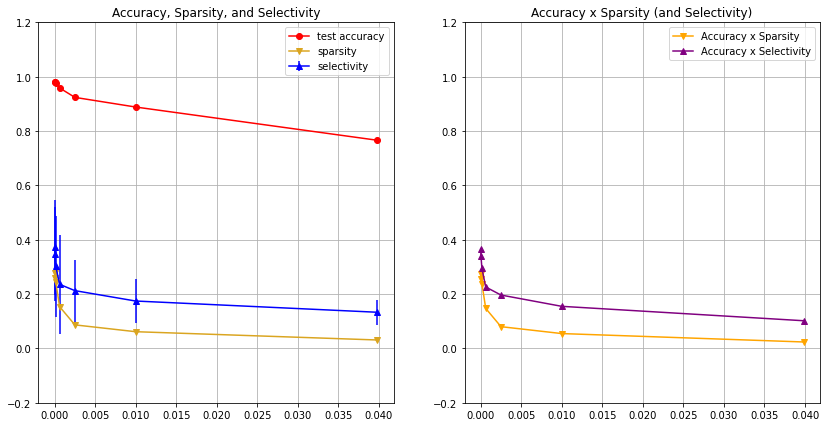

In [40]:
test_vals  = test_val_extractor('sparsity_selectivity_Adam_weight_decay.txt')
sparsities = sparsity_val_extractor('sparsity_selectivity_Adam_weight_decay.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("sparsity_selectivity_Adam_weight_decay.txt")

# modification 
new_test_vals = test_vals.copy()
new_sparsities = sparsities.copy()
new_selectivity_average = selectivity_average.copy()
new_selectivity_std = selectivity_std.copy()
new_weight_decay = weight_decay.copy()

new_test_vals = new_test_vals[:-4]
new_sparsities = new_sparsities[:-4]
new_selectivity_average = new_selectivity_average[:-4]
new_selectivity_std = new_selectivity_std[:-4]
new_weight_decay = new_weight_decay[:-4]

all_plotter(new_weight_decay, new_test_vals, new_sparsities, new_selectivity_average, new_selectivity_std, 'best')

# SGD

## learning rate

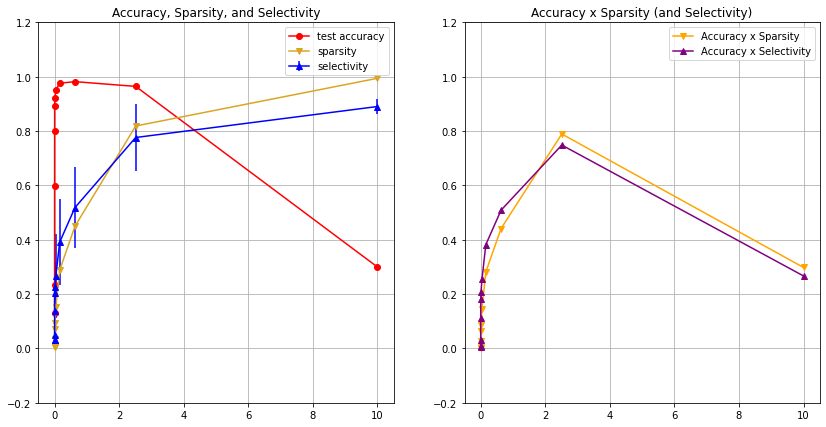

In [41]:
test_vals  = test_val_extractor('sparsity_selectivity_SGD_learning_rate.txt')
sparsities = sparsity_val_extractor('sparsity_selectivity_SGD_learning_rate.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("sparsity_selectivity_SGD_learning_rate.txt")

all_plotter(learning_rate, test_vals, sparsities, selectivity_average, selectivity_std, 'best')

## weight decay

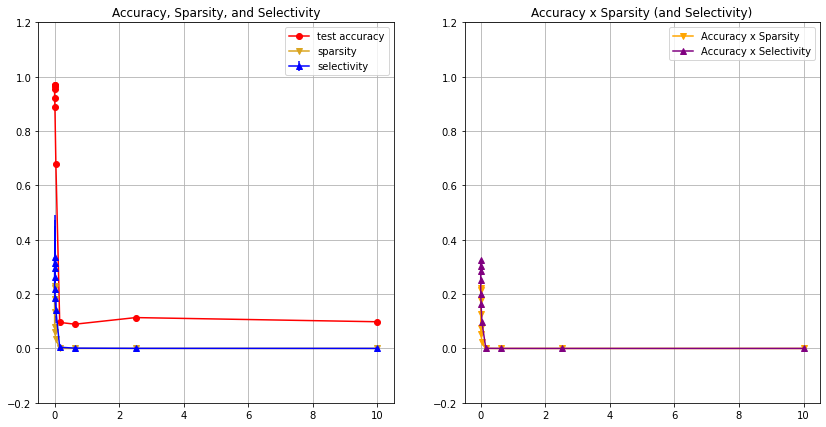

In [42]:
test_vals  = test_val_extractor('sparsity_selectivity_SGD_weight_decay.txt')
sparsities = sparsity_val_extractor('sparsity_selectivity_SGD_weight_decay.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("sparsity_selectivity_SGD_weight_decay.txt")

all_plotter(weight_decay, test_vals, sparsities, selectivity_average, selectivity_std, 'best')

## weight decay closer look

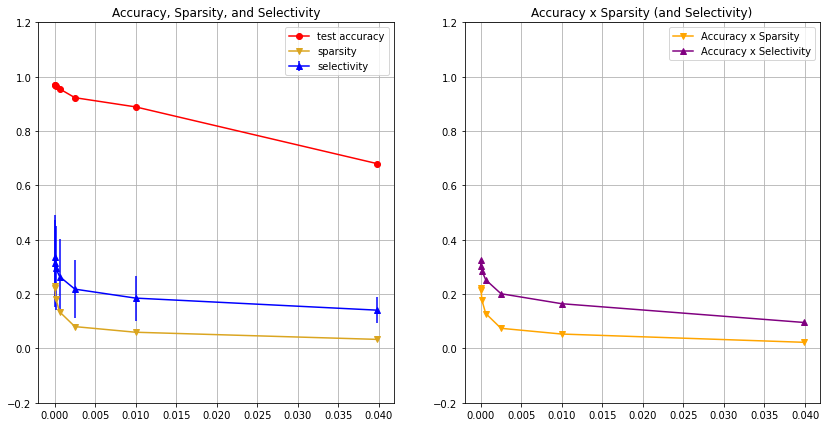

In [43]:
test_vals  = test_val_extractor('sparsity_selectivity_SGD_weight_decay.txt')
sparsities = sparsity_val_extractor('sparsity_selectivity_SGD_weight_decay.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("sparsity_selectivity_SGD_weight_decay.txt")

# modification 
new_test_vals = test_vals.copy()
new_sparsities = sparsities.copy()
new_selectivity_average = selectivity_average.copy()
new_selectivity_std = selectivity_std.copy()
new_weight_decay = weight_decay.copy()

new_test_vals = new_test_vals[:-4]
new_sparsities = new_sparsities[:-4]
new_selectivity_average = new_selectivity_average[:-4]
new_selectivity_std = new_selectivity_std[:-4]
new_weight_decay = new_weight_decay[:-4]

all_plotter(new_weight_decay, new_test_vals, new_sparsities, new_selectivity_average, new_selectivity_std, 'best')

## momentum

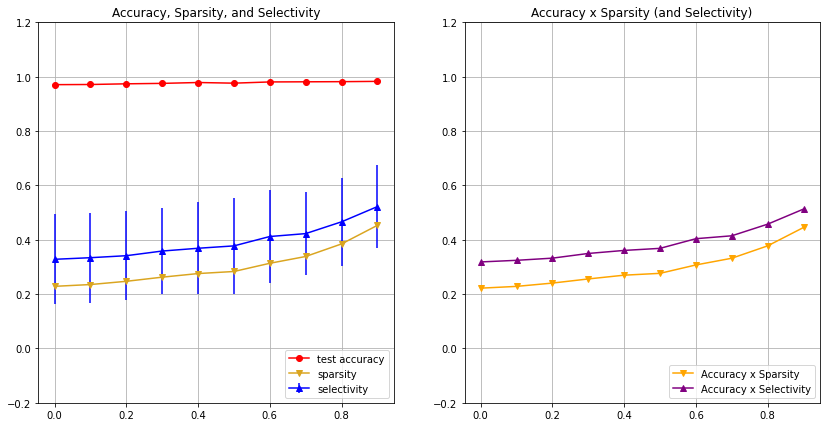

SGD momentum
accuacy value deviation of: momentum 0.9 - original= 0.0121
accuracy percentage deviation of: momentum 0.9 / original= 101.24678001030397

sparsity value deviation of: momentum 0.9 - original= 0.22440000000000002
sparsity percentage deviation of: momentum 0.9 / original= 198.20568927789935

selectivity avg value deviation of: momentum 0.9 - original= 0.19389911381370661
selectivity avg percentage deviation of: momentum 0.9 / original= 159.12555580775825

selectivity std value deviation of: momentum 0.9 - original= -0.01169522704227216
selectivity std percentage deviation of: momentum 0.9 / original= 92.91569720688202


In [46]:
test_vals  = test_val_extractor('sparsity_selectivity_SGD_momentum.txt')
sparsities = sparsity_val_extractor('sparsity_selectivity_SGD_momentum.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("sparsity_selectivity_SGD_momentum.txt")

all_plotter(momentum[:-1], test_vals[:-1], sparsities[:-1], selectivity_average[:-1], selectivity_std[:-1], 'lower right')

test_vals = test_vals[:-1]
sparsities = sparsities[:-1]
selectivity_average = selectivity_average[:-1]
selectivity_std = selectivity_std[:-1]

print("SGD momentum")
print("accuacy value deviation of: momentum 0.9 - original=", test_vals[-1] - test_vals[0])
print("accuracy percentage deviation of: momentum 0.9 / original=", (test_vals[-1] / test_vals[0])*100)
print()
print("sparsity value deviation of: momentum 0.9 - original=", sparsities[-1] - sparsities[0])
print("sparsity percentage deviation of: momentum 0.9 / original=", (sparsities[-1] / sparsities[0])*100)
print()
print("selectivity avg value deviation of: momentum 0.9 - original=", selectivity_average[-1] - selectivity_average[0])
print("selectivity avg percentage deviation of: momentum 0.9 / original=", (selectivity_average[-1] / selectivity_average[0])*100)
print()
print("selectivity std value deviation of: momentum 0.9 - original=", selectivity_std[-1] - selectivity_std[0])
print("selectivity std percentage deviation of: momentum 0.9 / original=", (selectivity_std[-1] / selectivity_std[0])*100)